In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Loading the datasets\
trade_gdp_data = pd.read_excel('Trade_percentage_of_gdp.xlsx', index_col = 'Years')
fdi_inflows_data = pd.read_excel('Foreign_direct_investment.xlsx', index_col = 'Years')
import_data = pd.read_excel('import.xlsx', index_col = 'Years')
export_data = pd.read_excel('export.xlsx', index_col = 'Years')
inflation_data = pd.read_excel("Inflation.xlsx",index_col = "Years")


In [3]:

# Checking for missing values
missing_values_trade_gdp = trade_gdp_data.isnull().sum()
missing_values_import_data = import_data.isnull().sum()
missing_values_fdi_inflows = fdi_inflows_data.isnull().sum()
missing_values_export_data = export_data.isnull().sum()
missing_values_inflation_data = inflation_data.isnull().sum()

# Print the missing value counts
print("Missing values in trade GDP data:", missing_values_trade_gdp)
print("Missing values in import data:", missing_values_import_data)
print("Missing values in FDI inflows data:", missing_values_fdi_inflows)
print("Missing values in export data:", missing_values_export_data)
print("Missing values in inflation data:", missing_values_inflation_data)


Missing values in trade GDP data: World             1
France            0
European Union    0
dtype: int64
Missing values in import data: World             0
France            0
European Union    0
dtype: int64
Missing values in FDI inflows data: World             0
France            0
European Union    0
dtype: int64
Missing values in export data: World             0
France            0
European Union    0
dtype: int64
Missing values in inflation data: World             0
France            0
European Union    0
dtype: int64


In [4]:
# Imputation for missing values
mean_imputer = SimpleImputer(strategy='mean')
trade_gdp_data['World'] = mean_imputer.fit_transform(trade_gdp_data[['World']]).ravel()


In [5]:
# Descriptive analysis for the datasets

# Descriptive statistics for Trade (% of GDP)
trade_gdp_desc = trade_gdp_data.describe()
inflation_data_desc = inflation_data.describe()
# Descriptive statistics for FDI net inflows
fdi_inflows_desc = fdi_inflows_data.describe()
import_data_desc = import_data.describe()
export_data_desc = export_data.describe()
trade_gdp_desc,fdi_inflows_desc, import_data_desc, export_data_desc, inflation_data_desc


(           World     France  European Union
 count  52.000000  52.000000       52.000000
 mean   44.736480  49.281193       65.492200
 std    10.654380   9.297682       17.137380
 min    25.126235  32.008959       39.546240
 25%    36.253345  41.950269       51.591851
 50%    44.014793  47.787663       59.911088
 75%    56.084907  56.531523       81.157976
 max    60.960836  72.143513      105.381019,
               World        France  European Union
 count  5.200000e+01  5.200000e+01    5.200000e+01
 mean   9.114719e+11  2.803434e+10    2.734544e+11
 std    9.501495e+11  2.809913e+10    3.328451e+11
 min    1.402086e+10  5.256559e+08   -7.678746e+10
 25%    6.358309e+10  2.593697e+09    1.031265e+10
 50%    4.760240e+11  2.129677e+10    1.022484e+11
 75%    1.767715e+12  4.246945e+10    4.849649e+11
 max    3.133732e+12  1.054250e+11    1.477512e+12,
            World     France  European Union
 count  53.000000  53.000000       53.000000
 mean   22.220645  24.524310       31.857883

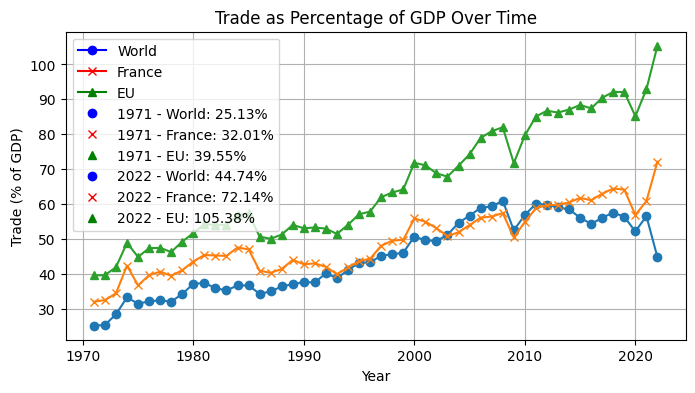

In [6]:
# Plotting Trade (% of GDP) over the years
plt.figure(figsize=(8, 4))
plt.plot(trade_gdp_data.index, trade_gdp_data['World'], label='World', marker='o')
plt.plot(trade_gdp_data.index, trade_gdp_data['France'], label='France', marker='x')
plt.plot(trade_gdp_data.index, trade_gdp_data['European Union'], label='European Union', marker='^')
plt.title('Trade as Percentage of GDP Over Time')
plt.xlabel('Year')
plt.ylabel('Trade (% of GDP)')

# Get the trade values for France, World, and European Union in 1970 and 2021
trade_france_1971 = trade_gdp_data.loc[1971, 'France']
trade_world_1971 = trade_gdp_data.loc[1971, 'World']
trade_eu_1971 = trade_gdp_data.loc[1971, 'European Union']
trade_france_2022 = trade_gdp_data.loc[2022, 'France']
trade_world_2022 = trade_gdp_data.loc[2022, 'World']
trade_eu_2022 = trade_gdp_data.loc[2022, 'European Union']

# Define custom legend entries with the trade values for 1970 and 2021
custom_legend = [
    plt.Line2D([0], [0], marker='o', color='blue', label=f'World'),
    plt.Line2D([0], [0], marker='x', color='red', label=f'France'),
    plt.Line2D([0], [0], marker='^', color='green', label=f'EU'),
    plt.Line2D([0], [0], linestyle='', marker='o', color='blue', label=f'1971 - World: {trade_world_1971:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='x', color='red', label=f'1971 - France: {trade_france_1971:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='^', color='green', label=f'1971 - EU: {trade_eu_1971:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='o', color='blue', label=f'2022 - World: {trade_world_2022:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='x', color='red', label=f'2022 - France: {trade_france_2022:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='^', color='green', label=f'2022 - EU: {trade_eu_2022:.2f}%'),
]

# Combine the custom legend entries with the existing legend
plt.legend(handles=custom_legend)

plt.grid(True)

# Save the plot as a PNG file
plt.savefig('trade_percentage_gdp_plot.png')

# Show the plot
plt.show()


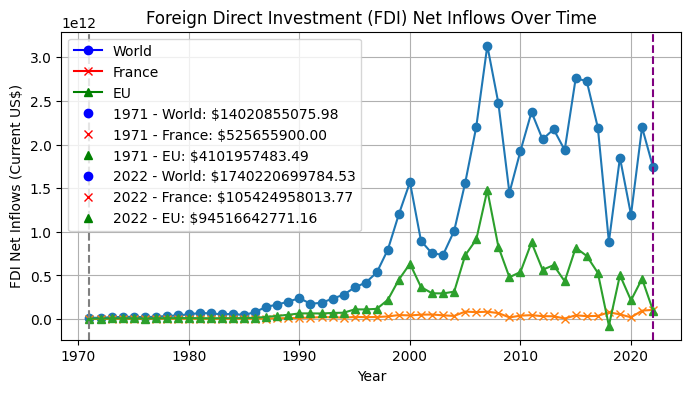

In [7]:
# Plotting Foreign Direct Investment (FDI) net inflows over the years
plt.figure(figsize=(8, 4))
plt.plot(fdi_inflows_data.index, fdi_inflows_data['World'], label='World', marker='o')
plt.plot(fdi_inflows_data.index, fdi_inflows_data['France'], label='France', marker='x')
plt.plot(fdi_inflows_data.index, fdi_inflows_data['European Union'], label='European Union', marker='^')
plt.title('Foreign Direct Investment (FDI) Net Inflows Over Time')
plt.xlabel('Year')
plt.ylabel('FDI Net Inflows (Current US$)')
plt.axvline(x=1971, color='gray', linestyle='--')
plt.axvline(x=2022, color='purple', linestyle='--') 

# Get the FDI inflows values for France, World, and European Union in 1970 and 2021
fdi_france_1971 = fdi_inflows_data.loc[1971, 'France']
fdi_world_1971 = fdi_inflows_data.loc[1971, 'World']
fdi_eu_1971 = fdi_inflows_data.loc[1971, 'European Union']
fdi_france_2022 = fdi_inflows_data.loc[2022, 'France']
fdi_world_2022 = fdi_inflows_data.loc[2022, 'World']
fdi_eu_2022 = fdi_inflows_data.loc[2022, 'European Union']

# Define custom legend entries with the FDI inflows values for 1970 and 2021
custom_legend = [
    plt.Line2D([0], [0], marker='o', color='blue', label=f'World'),
    plt.Line2D([0], [0], marker='x', color='red', label=f'France'),
    plt.Line2D([0], [0], marker='^', color='green', label=f'EU'),
    plt.Line2D([0], [0], linestyle='', marker='o', color='blue', label=f'1971 - World: ${fdi_world_1971:.2f}'),
    plt.Line2D([0], [0], linestyle='', marker='x', color='red', label=f'1971 - France: ${fdi_france_1971:.2f}'),
    plt.Line2D([0], [0], linestyle='', marker='^', color='green', label=f'1971 - EU: ${fdi_eu_1971:.2f}'),
    plt.Line2D([0], [0], linestyle='', marker='o', color='blue', label=f'2022 - World: ${fdi_world_2022:.2f}'),
    plt.Line2D([0], [0], linestyle='', marker='x', color='red', label=f'2022 - France: ${fdi_france_2022:.2f}'),
    plt.Line2D([0], [0], linestyle='', marker='^', color='green', label=f'2022 - EU: ${fdi_eu_2022:.2f}'),
]

# Combine the custom legend entries with the existing legend
plt.legend(handles=custom_legend)

plt.grid(True)

# Save the plot as a PNG file
plt.savefig('fdi_inflows_plot.png')

# Show the plot
plt.show()


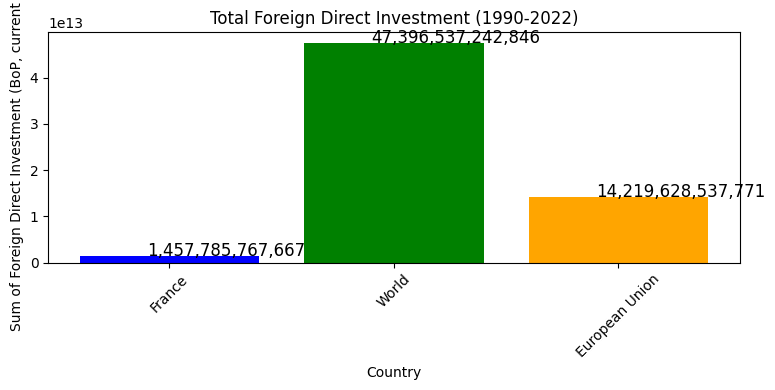

In [8]:

# Make sure the DataFrame has columns for 'France', 'World', and 'European Union'

# Calculate the sum of FDI inflows for each entity across the years
total_france_investment = fdi_inflows_data['France'].sum()
total_world_investment = fdi_inflows_data['World'].sum()
total_eu_investment = fdi_inflows_data['European Union'].sum()

# Create a bar chart to visualize the sum values
entities = ['France', 'World', 'European Union']
total_investments = [total_france_investment, total_world_investment, total_eu_investment]

plt.figure(figsize=(8, 4))
bars = plt.bar(entities, total_investments, color=['blue', 'green', 'orange'])
plt.xlabel('Country')
plt.ylabel('Sum of Foreign Direct Investment (BoP, current US$)')
plt.title('Total Foreign Direct Investment (1990-2022)')
plt.xticks(rotation=45)

# Add legends showing the values on top of the bars
for bar, value in zip(bars, total_investments):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height(), f'{value:,.0f}', fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()


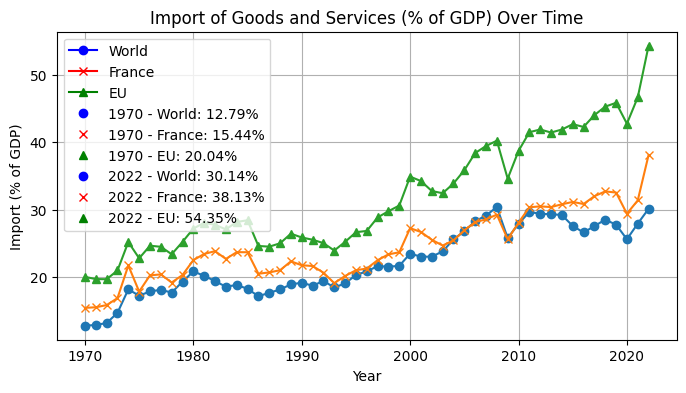

In [9]:
#import of goods
# Plotting Import of Goods and Services over the years
plt.figure(figsize=(8, 4))
plt.plot(import_data.index, import_data['World'], label='World', marker='o')
plt.plot(import_data.index, import_data['France'], label='France', marker='x')
plt.plot(import_data.index, import_data['European Union'], label='European Union', marker='^')
plt.title('Import of Goods and Services (% of GDP) Over Time')
plt.xlabel('Year')
plt.ylabel('Import (% of GDP)')

# Get the import values for France, World, and European Union in 1970 and 2021
import_france_1970 = import_data.loc[1970, 'France']
import_world_1970 = import_data.loc[1970, 'World']
import_eu_1970 = import_data.loc[1970, 'European Union']
import_france_2022 = import_data.loc[2022, 'France']
import_world_2022 = import_data.loc[2022, 'World']
import_eu_2022 = import_data.loc[2022, 'European Union']

# Define custom legend entries with the import values for 1970 and 2021
custom_legend = [
    plt.Line2D([0], [0], marker='o', color='blue', label=f'World'),
    plt.Line2D([0], [0], marker='x', color='red', label=f'France'),
    plt.Line2D([0], [0], marker='^', color='green', label=f'EU'),
    plt.Line2D([0], [0], linestyle='', marker='o', color='blue', label=f'1970 - World: {import_world_1970:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='x', color='red', label=f'1970 - France: {import_france_1970:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='^', color='green', label=f'1970 - EU: {import_eu_1970:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='o', color='blue', label=f'2022 - World: {import_world_2022:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='x', color='red', label=f'2022 - France: {import_france_2022:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='^', color='green', label=f'2022 - EU: {import_eu_2022:.2f}%'),
]

# Combine the custom legend entries with the existing legend
plt.legend(handles=custom_legend)

plt.grid(True)

# Save the plot as a PNG file
plt.savefig('import_goods_services_plot.png')

# Show the plot
plt.show()


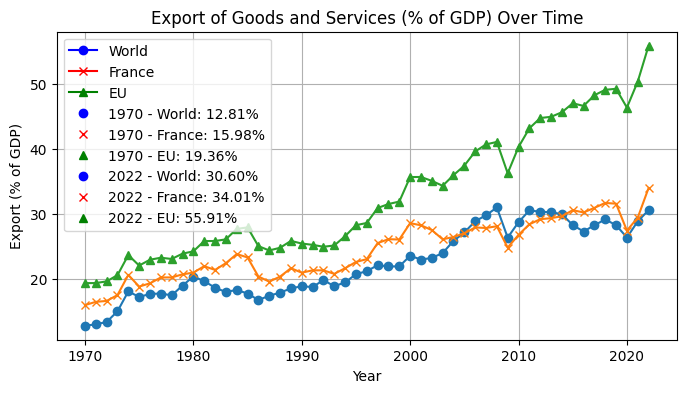

In [10]:
# Plotting Export of Goods and Services  over the years
plt.figure(figsize=(8, 4))
plt.plot(export_data.index, export_data['World'], label='World', marker='o')
plt.plot(export_data.index, export_data['France'], label='France', marker='x')
plt.plot(export_data.index, export_data['European Union'], label='European Union', marker='^')
plt.title('Export of Goods and Services (% of GDP) Over Time')
plt.xlabel('Year')
plt.ylabel('Export (% of GDP)')

# Get the export values for France, World, and European Union in 1970 and 2022
export_france_1970 = export_data.loc[1970, 'France']
export_world_1970 = export_data.loc[1970, 'World']
export_eu_1970 = export_data.loc[1970, 'European Union']
export_france_2022 = export_data.loc[2022, 'France']
export_world_2022 = export_data.loc[2022, 'World']
export_eu_2022 = export_data.loc[2022, 'European Union']

# Define custom legend entries with the export values for 1970 and 2022
custom_legend = [
    plt.Line2D([0], [0], marker='o', color='blue', label=f'World'),
    plt.Line2D([0], [0], marker='x', color='red', label=f'France'),
    plt.Line2D([0], [0], marker='^', color='green', label=f'EU'),
    plt.Line2D([0], [0], linestyle='', marker='o', color='blue', label=f'1970 - World: {export_world_1970:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='x', color='red', label=f'1970 - France: {export_france_1970:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='^', color='green', label=f'1970 - EU: {export_eu_1970:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='o', color='blue', label=f'2022 - World: {export_world_2022:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='x', color='red', label=f'2022 - France: {export_france_2022:.2f}%'),
    plt.Line2D([0], [0], linestyle='', marker='^', color='green', label=f'2022 - EU: {export_eu_2022:.2f}%'),
]

# Combine the custom legend entries with the existing legend
plt.legend(handles=custom_legend)

plt.grid(True)

# Save the plot as a PNG file
plt.savefig('export_goods_services_plot.png')

# Show the plot
plt.show()


In [11]:
#NET EXPORT
# Load the export and import data from the uploaded files
export_df = pd.read_excel('export.xlsx', index_col='Years')
import_df = pd.read_excel('import.xlsx', index_col='Years')

# Calculating net export (Export - Import) for each region
net_export_df = export_df - import_df

# Display the net export dataframe
net_export_df.head()


,World,France,European Union
Years,,,
1970,0.021395,0.543366,-0.674308
1971,0.112001,0.954405,-0.337629
1972,0.201191,0.775783,-0.051623
1973,0.328056,0.643472,-0.393972
1974,-0.094241,-1.095206,-1.522378


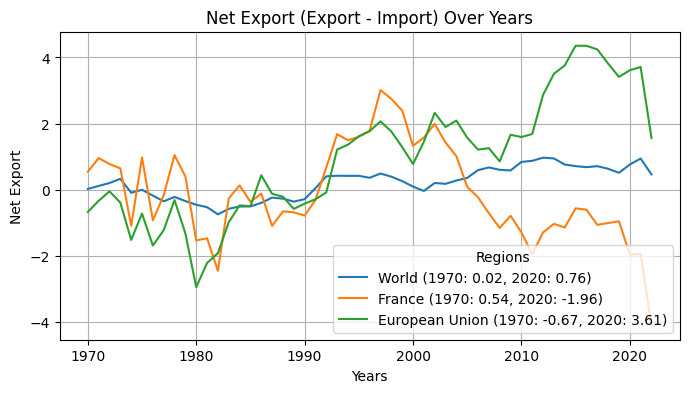

In [29]:
# Extracting the values for the years 1970 and 2020
net_export_1970 = net_export_df.loc[1970]
net_export_2020 = net_export_df.loc[2020]

# Creating custom legend labels with values for 1970 and 2020
legend_labels = [
    f"World (1970: {net_export_1970['World']:.2f}, 2020: {net_export_2020['World']:.2f})",
    f"France (1970: {net_export_1970['France']:.2f}, 2020: {net_export_2020['France']:.2f})",
    f"European Union (1970: {net_export_1970['European Union']:.2f}, 2020: {net_export_2020['European Union']:.2f})"
]

# Redrawing the plot with the updated legend
plt.figure(figsize=(8, 4))
net_export_df.plot(ax=plt.gca())
plt.title('Net Export (Export - Import) Over Years')
plt.ylabel('Net Export')
plt.xlabel('Years')
plt.grid(True)
plt.legend(title="Regions", labels=legend_labels)
plt.savefig('net_export_goods_services_plot.png')
plt.show()


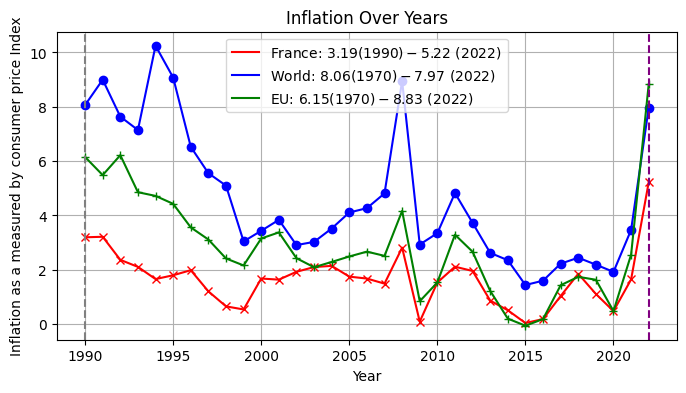

In [30]:
# Plotting the Inflation measured as a Consumer Price Index data
plt.figure(figsize=(8, 4))
plt.plot(inflation_data.index, inflation_data['World'], label='World', color='blue',marker = "o")
plt.plot(inflation_data.index, inflation_data['France'], label='France', color='red',marker ="x")
plt.plot(inflation_data.index, inflation_data['European Union'], label='European Union', color='green',marker = "+")
plt.title('Inflation Over Years')
plt.xlabel('Year')
plt.ylabel('Inflation as a measured by consumer price Index')
plt.axvline(x=1990, color='gray', linestyle='--')
plt.axvline(x=2022, color='purple', linestyle='--')  

# Get the Inflation values for France, World, and European Union in 1990 and 2022
inflation_france_1990 = inflation_data.loc[1990, 'France']
inflation_world_1990 = inflation_data.loc[1990, 'World']
inflation_eu_1990 = inflation_data.loc[1990, 'European Union']
inflation_france_2022 = inflation_data.loc[2022, 'France']  
inflation_world_2022 = inflation_data.loc[2022, 'World']    
inflation_eu_2022 = inflation_data.loc[2022, 'European Union']  

# Define custom legend entries with specific colors for France, World, and European Union
custom_legend = [
    plt.Line2D([0], [0], color='red', linestyle='-', label=f'France: ${inflation_france_1990:.2f} (1990) - ${inflation_france_2022:.2f} (2022)'),
    plt.Line2D([0], [0], color='blue', linestyle='-', label=f'World: ${inflation_world_1990:.2f} (1970) - ${inflation_world_2022:.2f} (2022)'),
    plt.Line2D([0], [0], color='green', linestyle='-', label=f'EU: ${inflation_eu_1990:.2f} (1970) - ${inflation_eu_2022:.2f} (2022)'),
]

# Combine the custom legend entries with the existing legend
plt.legend(handles=custom_legend)

plt.grid(True)

# Save the plot as a PNG file
plt.savefig('Inflation_current_plot.png')

# Show the plot
plt.show()


In [18]:
print("Nmae: Muhammad Qamar Abbas")
print("Erp: 22092")

Nmae: Muhammad Qamar Abbas
Erp: 22092
